# Assignment 3: Unsupervised Learning + NLP (Bonus)

Fill in the TODO sections and write short theory answers where asked.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage


## Load Dataset

In [2]:

# TODO: Load the Spotify dataset (or dataset used in Assignment 2)
df = pd.read_csv("/content/sample_data/spotifyaudiofeatures.csv")
df.head()


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


## Question 1: Data Preparation

**Q** - Why is feature scaling important in clustering?

Feature scaling is important in clustering because many algorithms (like K-Means and hierarchical clustering with Euclidean distance) are distance‑based, so features with larger numeric ranges dominate the distance computation and bias the clusters. Scaling puts all features on a comparable scale so that each contributes more fairly to the clustering result.

In [3]:

features = ["danceability", "energy", "loudness", "tempo", "valence"]

# TODO: Select features
X = df[features]

# TODO: Handle missing values
X=X.dropna()

In [4]:

scaler = StandardScaler()
# TODO: Scale features
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()


,danceability,energy,loudness,tempo,valence
0,0.801811,-0.818634,0.338380,2.868105,-1.368172
1,1.303251,0.002797,0.403106,1.354793,-0.433886
2,0.120242,0.628290,0.614583,-0.129041,-0.393265
3,1.079307,0.085693,-0.347491,0.141730,0.563178
4,0.996545,0.888284,-0.063102,0.042141,1.623021


## Question 2: Hierarchical Clustering

**Q:** What does a dendrogram show?

A dendrogram shows how data points are merged step‑by‑step in hierarchical clustering, visualizing the hierarchy of clusters and the distances at which clusters join, which helps in choosing a number of clusters by cutting the tree at a chosen height

In [5]:

# TODO: Perform linkage
linked = linkage(X_scaled, method="ward")


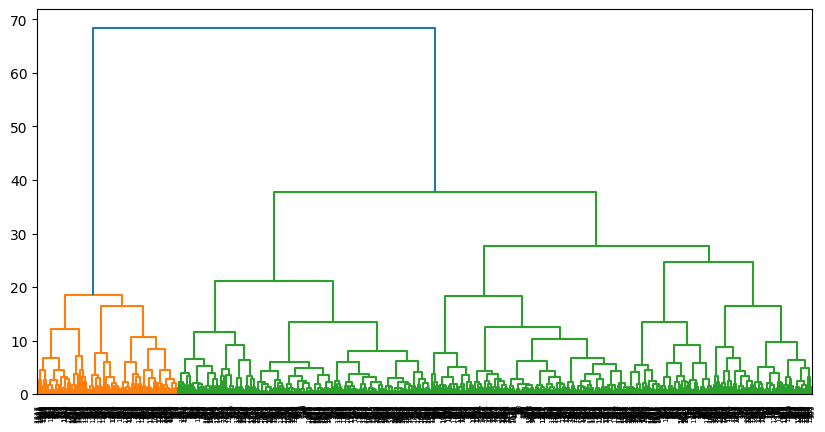

In [6]:

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.show()


In [7]:

# TODO: Choose number of clusters
n_clusters = 4

hc = AgglomerativeClustering(n_clusters=n_clusters)
df["HC_Cluster"] = hc.fit_predict(X_scaled)
df.head()


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,HC_Cluster
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15,0
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0,3
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,3
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,3
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,2


## Question 3: K-Means Clustering

**Q:** Why does K-Means need K?

K‑Means needs K because the algorithm explicitly partitions the data into a fixed number of clusters; it initializes K centroids and iteratively assigns points to the nearest centroid, so the desired number of clusters must be specified beforehand rather than being discovered automatically

In [11]:

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


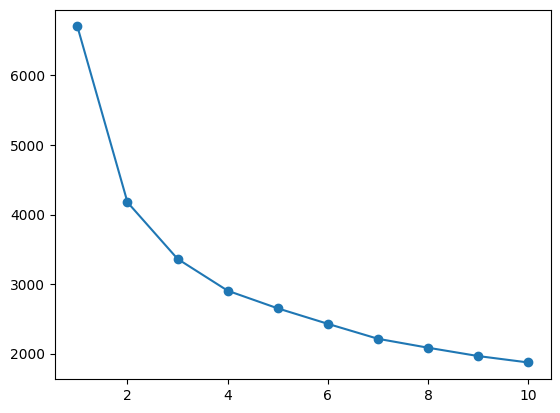

In [12]:

plt.plot(range(1,11), wcss, marker='o')
plt.show()


In [13]:

# TODO: Choose optimal K
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)
df.head()


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,HC_Cluster,KMeans_Cluster
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15,0,2
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0,3,2
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,3,0
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,3,1
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,2,1


## Question 4: PCA Visualization

In [14]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=["PC1","PC2"])


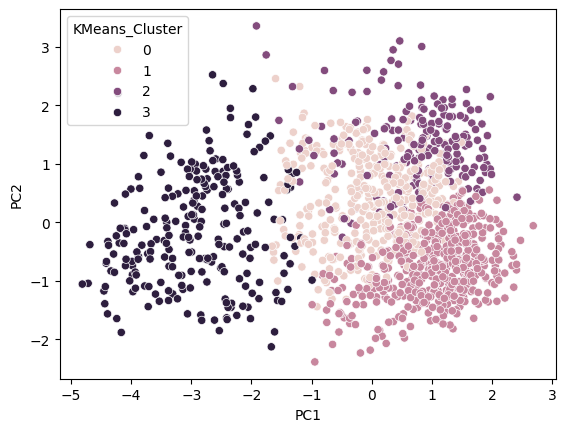

In [15]:

sns.scatterplot(x=X_pca.PC1, y=X_pca.PC2, hue=df["KMeans_Cluster"])
plt.show()


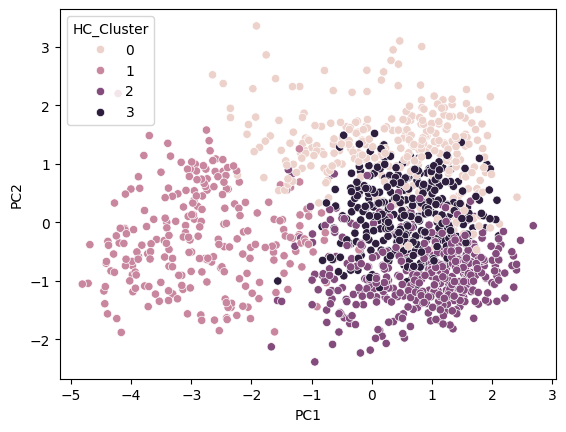

In [16]:

sns.scatterplot(x=X_pca.PC1, y=X_pca.PC2, hue=df["HC_Cluster"])
plt.show()


## Question 5: Gaussian Mixture Models

**Q:** Difference between K-Means and GMM?

K‑Means assigns each point to exactly one cluster using hard assignments and assumes spherical clusters with equal covariance, while GMM models each cluster as a Gaussian distribution with its own covariance and provides soft probabilistic assignments, allowing more flexible, overlapping cluster shapes

In [17]:

# TODO: Initialize and fit GMM
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(X_scaled)
df.head()


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,HC_Cluster,KMeans_Cluster,GMM_Cluster
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15,0,2,0
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0,3,2,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,3,0,0
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,3,1,1
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,2,1,1


In [18]:

# TODO: Show soft cluster probabilities
gmm_probs = gmm.predict_proba(X_scaled)
gmm_probs[:5]


array([[9.92713409e-01, 4.61542784e-11, 4.37435612e-03, 2.91223489e-03],
       [9.67540321e-01, 1.27016310e-02, 1.96941197e-02, 6.39280782e-05],
       [7.26575283e-01, 2.65993812e-01, 7.41919843e-03, 1.17060427e-05],
       [1.88044506e-03, 9.60011698e-01, 3.71585632e-02, 9.49294056e-04],
       [6.17256648e-07, 9.89703610e-01, 1.02680047e-02, 2.77678562e-05]])

## BONUS: NLP

In [ ]:

text = "Machine learning enables systems to learn from data."
# TODO: Tokenization, stemming, lemmatization


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

sentences = [
    "Machine learning is powerful",
    "Unsupervised learning finds patterns",
    "Clustering groups similar data"
]

# TODO: Apply Bag of Words or TF-IDF
